# Submission For Regularized Linear Regression

Name: Hoai Linh

Class: ML01

In [ ]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt

# 1: Implement lại các loss và r_squared bằng numpy

In [ ]:
def mse(y_true: np.array, y_pred: np.array):
    return np.mean((y_true-y_pred)**2)

def rmse(y_true: np.array, y_pred: np.array):
    return np.sqrt(np.mean((y_true-y_pred)**2))

def mae(y_true: np.array, y_pred: np.array):
    return np.mean(np.abs(y_true-y_pred))

def mape(y_true: np.array, y_pred: np.array):
    return np.mean(np.abs(y_true-y_pred)/y_true)*100


In [ ]:
# Các bạn có thể thử với dữ liệu ở đây
a = np.array([1,2,3,4,5])
b = np.array([1,4,4,4,5])
print(mse(a,b))
print(rmse(a,b))
print(mae(a,b))
print(mape(a,b))
print('\n\n')

1.0
1.0
0.6
26.666666666666668





# 2: Implement lại Ridge Regression

In [ ]:
class RR_byNumpy:
#     X; y; ypre; w; lmda stands for lambda;
    def __init__(self, lmda = 0):
        self.w = None
        self.lmda = lmda
    def set_lmda(self, new_lmda):
        self.lmda = new_lmda
    def fit(self, X, y):
        # Tạo Vector X
        X = np.column_stack([np.ones(len(X)), X])
        I = np.identity(X.shape[1])
        # Tính w = (XT.X+lambda.I)^-1.XT.y
        self.w = np.linalg.inv(X.T @ X + self.lmda*I) @ X.T @ y.reshape(-1, 1)
    def predict(self, X):
        X = np.column_stack([np.ones(len(X)), X])
        # Tínhypre
        ypre= X @ self.w
        return ypre.flatten()

#3: Tạo dữ liệu toy_data

In [ ]:
def create_toy_data(func, sample_size=100, standard_deviation=0.25):
    x = np.linspace(0, 1, sample_size)
    t = func(x) + np.random.normal(scale=standard_deviation, size=x.shape)
    return x, t

def func(x):
    return np.sin(2 * np.pi * x)

In [ ]:
ini_sample = 10
train = create_toy_data(func, ini_sample)
val = create_toy_data(func, ini_sample)
print("With 10 sample:")
print("x_train:",np.matrix(train[0]))
print("t_train:",np.matrix(train[1]))
print("x_val:",np.matrix(val[0]))
print("t_val:",np.matrix(val[1]))

With 10 sample:
x_train: [[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
  0.66666667 0.77777778 0.88888889 1.        ]]
t_train: [[-0.59027332  0.69141345  0.8941067   0.87318421  0.42714154 -0.4433185
  -0.83578097 -1.2956463  -0.29381753 -0.26365693]]
x_val: [[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
  0.66666667 0.77777778 0.88888889 1.        ]]
t_val: [[ 0.08382376  1.24058125  1.03461744  1.40801487 -0.30141164 -0.27119222
  -1.12005436 -0.62203755 -0.67317973 -0.44524946]]


In [ ]:
#Train 10 samples
plt.scatter(train[0], train[1], color='blue')
plt.scatter(val[0], val[1], color='red')
plt.show()

# 3b: Lần lượt fit các model đa thức bậc 0, 1, 2,...,9

In [ ]:
#fit model đa thức bậc 0
print("---Degree 0---")
model_0 = RR_byNumpy()
train_0 = train[0]*0
model_0.fit(train_0,train[1])
val_0 = val[0]*0
print("Vector w:\n", model_0.w)
loss_train = mse(model_0.predict(train_0),train[1])
loss_val = mse(model_0.predict(val_0),val[1])
print("Train loss:",loss_train)
print("Val loss:",loss_val)

---Degree 0---
Vector w:
 [[-0.08202428]
 [ 0.        ]]
Train loss: 0.5230435659139252
Val loss: 0.7178329775104686


In [ ]:
#fit model đa thức bậc 1
print("---Degree 1---")
model_1 = RR_byNumpy()
train_1 = train[0]
model_1.fit(train_1,train[1])
val_1 = val[0]
print("Vector w:\n", model_1.w)
loss_train = mse(model_1.predict(train_1),train[1])
loss_val = mse(model_1.predict(val_1),val[1])
print("Train loss:",loss_train)
print("Val loss:",loss_val)

---Degree 1---
Vector w:
 [[ 0.37025386]
 [-0.9226474 ]]
Train loss: 0.39550804194769695
Val loss: 0.45820007999109336


In [ ]:
#fit model đa thức bậc 2
print("---Degree 2---")
model_2 = RR_byNumpy()
train_2 = np.column_stack([train_1, train[0]**2])
model_2.fit(train_2,train[1])
val_2 = np.column_stack([val_1, val[0]**2])
print("Vector w:\n", model_2.w)
loss_train = mse(model_2.predict(train_2),train[1])
loss_val = mse(model_2.predict(val_2),val[1])
print("Train loss:",loss_train)
print("Val loss:",loss_val)

---Degree 2---
Vector w:
 [[ 0.32947663]
 [-0.37871949]
 [-0.65473915]]
Train loss: 0.3824367878136855
Val loss: 0.44160466368819434


In [ ]:
#fit model đa thức bậc 3
print("---Degree 3---")
model_3 = RR_byNumpy()
train_3 = np.column_stack([train_2, train[0]**3])
model_3.fit(train_3,train[1])
val_3 = np.column_stack([val_2, val[0]**3])
print("Vector w:\n", model_3.w)
loss_train = mse(model_3.predict(train_3),train[1])
loss_val = mse(model_3.predict(val_3),val[1])
print("Train loss:",loss_train)
print("Val loss:",loss_val)

---Degree 3---
Vector w:
 [[ 0.3270759 ]
 [-0.36948404]
 [-0.63231423]
 [-0.03621322]]
Train loss: 0.38311003982779
Val loss: 0.44243041543288725


In [ ]:
#fit model đa thức bậc 4
print("---Degree 4---")
model_4 = RR_byNumpy()
train_4 = np.column_stack([train_3, train[0]**4])
model_4.fit(train_4,train[1])
val_4 = np.column_stack([val_3, val[0]**4])
print("Vector w:\n", model_4.w)
loss_train = mse(model_4.predict(train_4),train[1])
loss_val = mse(model_4.predict(val_4),val[1])
print("Train loss:",loss_train)
print("Val loss:",loss_val)

---Degree 4---
Vector w:
 [[ 0.34388889]
 [-0.38810619]
 [-0.75206461]
 [-0.22056696]
 [ 0.36587894]]
Train loss: 0.37134022391548294
Val loss: 0.4296394929337176


In [ ]:
#fit model đa thức bậc 5
print("---Degree 5---")
model_5 = RR_byNumpy()
train_5 = np.column_stack([train_4, train[0]**5])
model_5.fit(train_5,train[1])
val_5 = np.column_stack([val_4, val[0]**5])
print("Vector w:\n", model_5.w)
loss_train = mse(model_5.predict(train_5),train[1])
loss_val = mse(model_5.predict(val_5),val[1])
print("Train loss:",loss_train)
print("Val loss:",loss_val)

---Degree 5---
Vector w:
 [[ 0.36003283]
 [-0.37174449]
 [-0.84851033]
 [-0.40099674]
 [ 0.12697554]
 [ 0.56318469]]
Train loss: 0.35254851839823714
Val loss: 0.4109062157327993


In [ ]:
#fit model đa thức bậc 6
print("---Degree 6---")
model_6 = RR_byNumpy()
train_6 = np.column_stack([train_5, train[0]**6])
model_6.fit(train_6,train[1])
val_6 = np.column_stack([val_5, val[0]**6])
print("Vector w:\n", model_6.w)
loss_train = mse(model_6.predict(train_6),train[1])
loss_val = mse(model_6.predict(val_6),val[1])
print("Train loss:",loss_train)
print("Val loss:",loss_val)

---Degree 6---
Vector w:
 [[ 0.37043209]
 [-0.334611  ]
 [-0.9007069 ]
 [-0.52974835]
 [-0.05984786]
 [ 0.33305539]
 [ 0.6284753 ]]
Train loss: 0.33397394438427985
Val loss: 0.3938187731443873


In [ ]:
#fit model đa thức bậc 7
print("---Degree 7---")
model_7 = RR_byNumpy()
train_7 = np.column_stack([train_6, train[0]**7])
model_7.fit(train_7,train[1])
val_7 = np.column_stack([val_6, val[0]**7])
print("Vector w:\n", model_7.w)
loss_train = mse(model_7.predict(train_7),train[1])
loss_val = mse(model_7.predict(val_7),val[1])
print("Train loss:",loss_train)
print("Val loss:",loss_val)

---Degree 7---
Vector w:
 [[ 0.37564082]
 [-0.29288588]
 [-0.92021513]
 [-0.60978992]
 [-0.18944426]
 [ 0.16442427]
 [ 0.42923975]
 [ 0.61792924]]
Train loss: 0.3190976046966063
Val loss: 0.3812250696467995


In [ ]:
#fit model đa thức bậc 8
print("---Degree 8---")
model_8 = RR_byNumpy()
train_8 = np.column_stack([train_7, train[0]**8])
model_8.fit(train_8,train[1])
val_8 = np.column_stack([val_7, val[0]**8])
print("Vector w:\n", model_8.w)
loss_train = mse(model_8.predict(train_8),train[1])
loss_val = mse(model_8.predict(val_8),val[1])
print("Train loss:",loss_train)
print("Val loss:",loss_val)

---Degree 8---
Vector w:
 [[ 0.37738806]
 [-0.2552079 ]
 [-0.92084074]
 [-0.65471753]
 [-0.27334441]
 [ 0.04830734]
 [ 0.28691508]
 [ 0.45431038]
 [ 0.56748652]]
Train loss: 0.30865393299560534
Val loss: 0.37318639872867937


In [ ]:
#fit model đa thức bậc 9
print("---Degree 9---")
model_9 = RR_byNumpy()
train_9 = np.column_stack([train_8, train[0]**9])
model_9.fit(train_9,train[1])
val_9 = np.column_stack([val_8, val[0]**9])
print("Vector w:\n", model_9.w)
loss_train = mse(model_9.predict(train_9),train[1])
loss_val = mse(model_9.predict(val_9),val[1])
print("Train loss:",loss_train)
print("Val loss:",loss_val)

---Degree 9---
Vector w:
 [[ 0.3771862 ]
 [-0.22469436]
 [-0.91244084]
 [-0.67713924]
 [-0.32487327]
 [-0.02837471]
 [ 0.189095  ]
 [ 0.33886824]
 [ 0.437356  ]
 [ 0.49880507]]
Train loss: 0.302079475836747
Val loss: 0.3687198137157358


## Nhận xét

Bậc càng cao, Train loss và Val loss đều có xu hướng giảm, tuy nhiên Train loss giảm nhanh hơn => Chuyển dịch từ Underfitting sang Overfitting.

# 3d: visualize model với đa thức bậc 1, 3, 6, 9

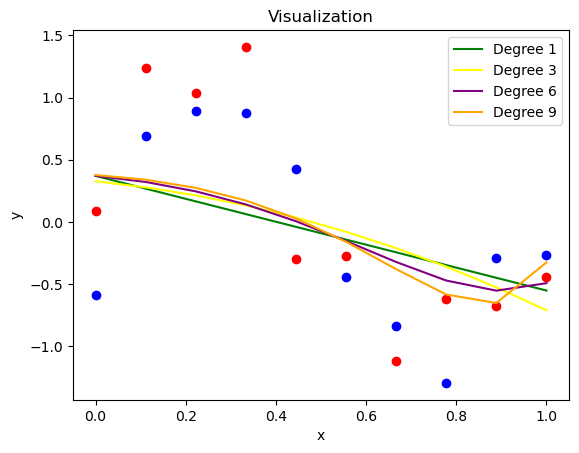

In [ ]:
plt.scatter(train[0], train[1], color='blue')
plt.scatter(val[0], val[1], color='red')
plt.plot(val[0], model_1.predict(val_1), label = "Degree 1", color = 'green')
plt.plot(val[0], model_3.predict(val_3), label = "Degree 3", color = 'yellow')
plt.plot(val[0], model_6.predict(val_6), label = "Degree 6", color = 'purple')
plt.plot(val[0], model_9.predict(val_9), label = "Degree 9", color = 'orange')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Visualization')
plt.legend()
plt.show()

# 4: Với model đa thức bậc 9, mô hình bị overfitting, thử các cách sau để tránh overfitting:

In [ ]:
#Implement lại Ridge Regression cho Bậc 9
class RR9_byNumpy:
#     X; y; ypre; w; lmda stands for lambda;
    def __init__(self, lmda = 0.2):
        self.w = None
        self.lmda = lmda
    def set_lmda(self, new_lmda):
        self.lmda = new_lmda
    def fit(self, X, y):
        # Tạo Vector X
        X = np.column_stack([np.ones(len(X)), X, X**2, X**3, X**4, X**5, X**6, X**7, X**8, X**9])
        I = np.identity(X.shape[1])
        # Tính w = (XT.X+lambda.I)^-1.XT.y
        self.w = np.linalg.inv(X.T @ X + self.lmda*I) @ X.T @ y.reshape(-1, 1)
    def predict(self, X):
        X = np.column_stack([np.ones(len(X)), X, X**2, X**3, X**4, X**5, X**6, X**7, X**8, X**9])
        # Tínhypre
        ypre= X @ self.w
        return ypre.flatten()

# 4a: Tăng tập train thêm 10 điểm dữ liệu

In [ ]:
#Train 20 samples
print("With 20 samples:")
_20train = create_toy_data(func, ini_sample+10)
_20model = RR9_byNumpy()
_20model.fit(_20train[0],_20train[1])
print("Vector w:\n", _20model.w)
loss_train = mse(_20model.predict(_20train[0]),_20train[1])
loss_val = mse(_20model.predict(val[0]),val[1])
print("Train loss:",loss_train)
print("Val loss:",loss_val)

With 20 samples:
Vector w:
 [[ 0.66109517]
 [-0.34592856]
 [-1.37157618]
 [-1.01893988]
 [-0.46532854]
 [-0.00376601]
 [ 0.32410997]
 [ 0.53876016]
 [ 0.66953852]
 [ 0.74140942]]
Train loss: 0.2770594027272218
Val loss: 0.2839969338939612


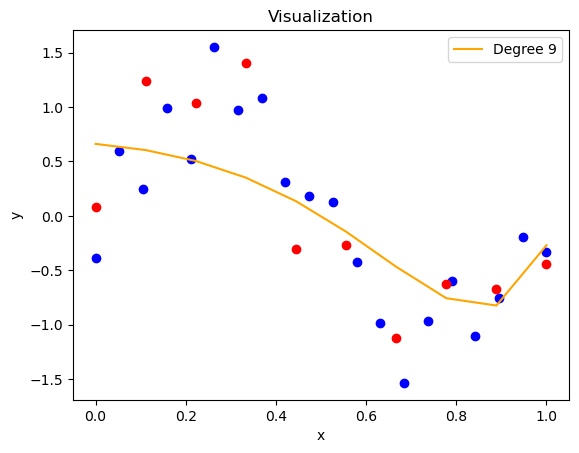

In [ ]:
plt.scatter(_20train[0], _20train[1], color='blue')
plt.scatter(val[0], val[1], color='red')
plt.plot(val[0], _20model.predict(val[0]), label = "Degree 9", color = 'orange')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Visualization')
plt.legend()
plt.show()

# 4b: Tăng tập train thêm 90 điểm dữ liệu

In [ ]:
#Train 100 samples
_100train = create_toy_data(func, ini_sample+90)
print("With 100 samples:")
_100model = RR9_byNumpy()
_100model.fit(_100train[0],_100train[1])
print("Vector w:\n", _100model.w)
loss_train = mse(_100model.predict(_100train[0]),_100train[1])
loss_val = mse(_100model.predict(val[0]),val[1])
print("Train loss:",loss_train)
print("Val loss:",loss_val)

With 100 samples:
Vector w:
 [[ 0.77582526]
 [ 0.05814421]
 [-2.44960809]
 [-1.70517142]
 [-0.53221493]
 [ 0.33513016]
 [ 0.83570717]
 [ 1.05656457]
 [ 1.09187869]
 [ 1.01354634]]
Train loss: 0.12069600968863665
Val loss: 0.3205041697978744


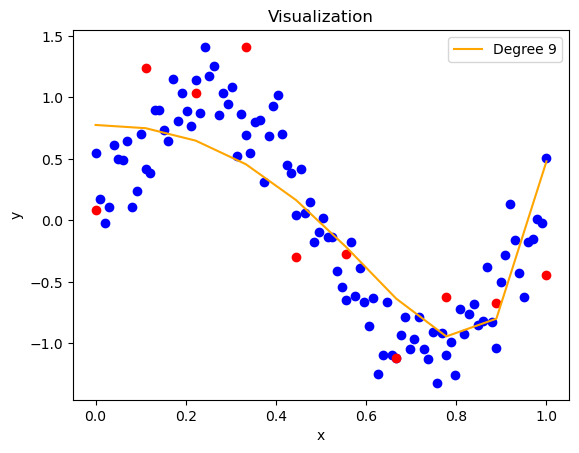

In [ ]:
plt.scatter(_100train[0], _100train[1], color='blue')
plt.scatter(val[0], val[1], color='red')
plt.plot(val[0], _100model.predict(val[0]), label = "Degree 9", color = 'orange')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Visualization')
plt.legend()
plt.show()

# 4c: Nhận xét

Việc tăng samples giúp giảm mạnh Val loss => giúp giảm Overfitting

# 4d: thử Ridge regression implement ở trên với các giá trị $\lambda$ khác nhau (0.1, 1, 10,...) xem giá trị nào tránh overfitting tốt nhất

In [ ]:
#Thử Lambda = 0.1
print("With 10 samples, lambda = 0.1:")
_1lambda = RR9_byNumpy()
_1lambda.set_lmda(0.1)
_1lambda.fit(train[0],train[1])
print("Vector w:\n", _1lambda.w)
loss_train = mse(_1lambda.predict(train[0]),train[1])
loss_val = mse(_1lambda.predict(val[0]),val[1])
print("Train loss:",loss_train)
print("Val loss:",loss_val)

With 10 samples, lambda = 0.1:
Vector w:
 [[ 0.38383277]
 [ 0.0848009 ]
 [-1.29943179]
 [-0.99110036]
 [-0.45840056]
 [-0.01589328]
 [ 0.29375088]
 [ 0.49043914]
 [ 0.60308159]
 [ 0.65657336]]
Train loss: 0.2746745069497489
Val loss: 0.3405654870589708


In [ ]:
#Thử Lambda = 1
print("With 10 samples, lambda = 1:")
_1lambda = RR9_byNumpy()
_1lambda.set_lmda(1)
_1lambda.fit(train[0],train[1])
print("Vector w:\n", _1lambda.w)
loss_train = mse(_1lambda.predict(train[0]),train[1])
loss_val = mse(_1lambda.predict(val[0]),val[1])
print("Train loss:",loss_train)
print("Val loss:",loss_val)

With 10 samples, lambda = 1:
Vector w:
 [[ 0.2132695 ]
 [-0.2679111 ]
 [-0.3730838 ]
 [-0.26804799]
 [-0.14584528]
 [-0.04468929]
 [ 0.03201499]
 [ 0.08835646]
 [ 0.12918204]
 [ 0.15855111]]
Train loss: 0.3760969906202156
Val loss: 0.4770729008681892


In [ ]:
#Thử Lambda = 10
print("With 10 samples, lambda = 10:")
_1lambda = RR9_byNumpy()
_1lambda.set_lmda(10)
_1lambda.fit(train[0],train[1])
print("Vector w:\n", _1lambda.w)
loss_train = mse(_1lambda.predict(train[0]),train[1])
loss_val = mse(_1lambda.predict(val[0]),val[1])
print("Train loss:",loss_train)
print("Val loss:",loss_val)

With 10 samples, lambda = 10:
Vector w:
 [[ 0.01535022]
 [-0.07430377]
 [-0.08270208]
 [-0.06714848]
 [-0.0502431 ]
 [-0.03624811]
 [-0.02543655]
 [-0.01725878]
 [-0.0111025 ]
 [-0.00646045]]
Train loss: 0.4628320858270952
Val loss: 0.6190015706957059


Nhận xét: Lambda càng nhỏ thì Val loss càng thấp => Lambda nhỏ giúp tránh overfitting. Lambda lớn sẽ dẫn đến các hệ số của đa thức giảm gần 0 => Gây ra underfitting